In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_iris

In [30]:
X,y = load_iris(return_X_y=True)
filter = y != 2              # накладываем фильтр - только 2 признака
X = X[filter]
y = y[filter]

COEFS = np.random.randn(5)   # генерируем случайные коэффициенты

In [31]:
def predict_proba(coefs, x):
    # формула логистической регрессии:
    asarray_c = np.squeeze(np.asarray(coefs[:4]))
    asarray_x = np.squeeze(np.asarray(x))
    return 1. / (1. + np.exp( -(asarray_x.dot(asarray_c) + coefs[-1])))

In [32]:
# теперь на основе модели предсказываем класс (но модель пока не обучена: 
# это сделаем градиентным спуском чуть позже)
def predict_class(coefs, x):
    probas = predict_proba(coefs, x)
    return (probas > 0.5).astype(np.float)

In [33]:
# явно прописываем функцию потерь на основе ее формулы
def bce_loss(coefs, x, y):
    probas = predict_proba(coefs, x)
    filter_ones = y == 1
    loss = -1. * (np.sum(np.log(probas[filter_ones])) + np.sum(np.log(1. - probas[~filter_ones]))) / len(y)
    return loss

In [34]:
# расчет градиента:
# он зависит от двух сущностей: от модели и функции потерь
def grad(coefs, x, y, sgd=0):
    probas = predict_proba(coefs, x)
    delta = probas - y
    modified_x = x.T * delta
    deltas = np.mean(modified_x, axis=1)
    if sgd == 1:
        return deltas, np.mean(delta)
    return *deltas, np.mean(delta)

In [35]:
# обучение модели методом градиентного спуска
def learn_sgd(coefs, x, y, num_epochs=32, learning_rate=0.1):
    losses = []
    new_coefs = coefs
    for e in range(num_epochs):
        grad_coefs, grad_bias = grad(coefs, x, y, 1)
        new_coefs[:-1] = new_coefs[:-1] - learning_rate * grad_coefs
        new_coefs[-1] = new_coefs[-1] - learning_rate * grad_bias
        loss = bce_loss(new_coefs, x, y)
        losses.append(loss)
    return losses, new_coefs

In [36]:
loss_1, coefs_1 = learn_sgd(COEFS, X, y)

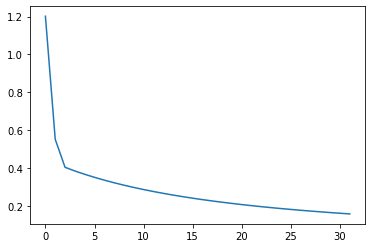

In [37]:
plt.plot(loss_1)
plt.show()

In [38]:
def learn_nesterov(coefs, x, y, num_epochs=32, momentum=0.9, learning_rate=0.1):
    v_t = [0 for _ in range(len(coefs))]
    losses = []
    new_coefs = coefs
    for it in range(num_epochs):
        pr_coefs  = [coefs[i] - momentum*v_t[i] for i in range(len(coefs))]
        gr_coefs = grad(pr_coefs, x, y)
        for i in range(len(coefs)):
            v_t[i] = momentum*v_t[i] + learning_rate*gr_coefs[i]
            new_coefs[i] = coefs[i] - v_t[i]
        losses.append(bce_loss(new_coefs, x, y))
    return losses, new_coefs

In [39]:
loss_2, coefs_2 = learn_nesterov(COEFS, X, y)

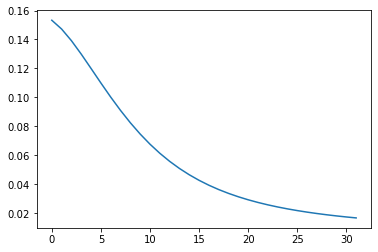

In [40]:
plt.plot(loss_2)
plt.show()

In [41]:
def learn_RMSprop(coefs, x, y, num_epochs=32, momentum=0.9, learning_rate=0.1):
    e = 10**(-8)
    S = [0 for _ in range(len(coefs))]
    losses =[]
    new_coefs = coefs
    for it in range(num_epochs):
        gr_coefs = grad(new_coefs, x, y)
        gr_coefs_2 = [x**2 for x in gr_coefs]
        for i in range(len(coefs)):
            S[i]=momentum*S[i] + (1-momentum)*gr_coefs_2[i]
            new_coefs[i] = new_coefs[i]-learning_rate* (gr_coefs[i]/(math.sqrt(S[i])+e))  
        losses.append(bce_loss(new_coefs, x, y))
    return losses, new_coefs

In [42]:
loss_3, coefs_3 = learn_RMSprop(COEFS, X, y)

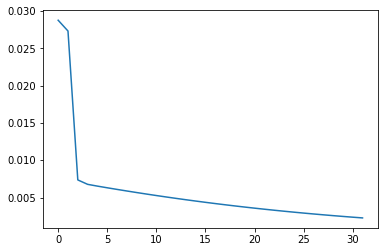

In [43]:
plt.plot(loss_3)
plt.show()